###__Dane do analizy__:  MNIST.csv (Modified National Institute of Standards and Technology database)

###__Cel badania__:  Analiza algorytmu selekcji cech PCA . Wizualizacja danych  za pomocą PCA i t-SNE

###__Klasyfikator__:   Decision tree, kNN, Logistic Regression  +PCA

####__Zadanie 1__: Ładowanie zbioru treningowego, testowego, wstępna analiza  i dodawanie nazw dla kolumn
* Dodać nazwy kolumn: <span style='color:red'>  class, pixel1, pixel2,...pixel 784 </span>
* Wyznaczyć liczbę rekordów, liczbę cech w zbiorze treningowym i testowym.
* Wyznaczyć rozkład kategorii (w procentach).
* Narysować wykres słupkowy rozkładu kategorii.

#####__Zadanie 2__:  Analiza głównych składowych <i>PCA</i>

__Wskazówka__: <span style='color:red'>  from sklearn.decomposition import PCA </span>
##### __Zadanie 2.1__:  Zmienić parametru algorytmu, żeby otrzymać procent wyjaśnionej wariancji wynosi 0.90. Ile wynosi liczba wymiarów?
__Wskazówka: Zmienić parametry__
* Ustawić pca.explained_variance_ratio_
#####__Zadanie 2.2__ :Ile wynosi stopień wyjaśnionej wariancji, jeśli liczna wymiarów należy do przedziału od  [10, 150]?.

####__Zadanie 3__ : Wyznaczyć liczbę wymiarów PCA, żeby stopień wyjaśnionej wariancji = 0.9. Wykonać redukcję danych. Przekształcić dane treningowe i testowe na nową przestrzenią.


####__Zadanie 4__ : Wizualizować  dane oryginalne i dane skompresowane.

##### __Zadanie__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas
__Wskazówka__: <span style='color:red'>   from sklearn.tree import DecisionTreeClassifier </span>

####__Zadanie 6__ : Trenować klasyfikator  <i> DT </i>  z optymalizacją parametrów na danych skompresowanych.  Wyświetlić czas.

####__Zadanie 7__: Trenować klasyfikator  <i> Logistic Regression </i>  z optymalizacją parametrów na danych oryginalnych.  Wyświetlić czas i skuteczność modelu.
__Wskazówka__: <span style='color:red'>  from sklearn.linear_model import LogisticRegression  </span>

####__Zadanie 8__: Trenować klasyfikator  <i>k-NN </i>  z optymalizacją parametrów na danych oryginalnych i zredukowanych.  Wyświetlić czas i skuteczność modelu.

####__Zadanie 9__: Wizualizować dane na dwóch wymiarach wyznaczonych przez t-NSE i PCA (liczba wymiarów =2).

####__Zadanie 10__: Napisać podsumowanie

1. Jaki procent wyjaśnialności wariancji trzeba wybrać, żeby jakość klasyfikatora na danych skompresowanych jest przybliżona do modelu budowanego na danych oryginalnych?  
klasyfikator jest najlepszy i z jakimi parametrami?
2. Wśród algorytmów DT, KNN i Logistic Regression, który model zyskuje najwięcej czasu na danych zredukowanych?
3. Która wizualizacja jest lepsza, za pomocą t-SNE (*t-distributed Stochastic Neighbor Embedding*), czy PCA?


# Zadanie 1: Importowanie danych

In [ ]:
#Importowanie danych z lokalnego dysku

import pandas as pd

# Twój kod


print(df_train.shape)
df_train.head(10)

(60000, 785)


,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train = df_train.iloc[:,1:785]
y_train = df_train.iloc[:,0]
X_test = df_test.iloc[:,1:785]
y_test = df_test.iloc[:,0]

print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


# Zadanie 2: Algorytm PCA. Dobrać parametr

In [ ]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.5) + 1

In [ ]:
pca = PCA(n_components=11)
X_reduced = pca.fit_transform(X_train)

In [ ]:
pca.n_components_

11

In [ ]:
np.sum(pca.explained_variance_ratio_)

0.5092410383737432

In [ ]:
# Zadanie 3: Przekształcić dane treningowe i testowe na nową przestrzeń

In [ ]:
pca = PCA(n_components = 11)
X_reduced_np = pca.fit_transform(X_train)
X_recovered_np = pca.inverse_transform(X_reduced)
X_reduced = pd.DataFrame(X_reduced_np)
X_recovered = pd.DataFrame(X_recovered_np)

# Zadanie 4: Wizualizacja danych oryginalnych

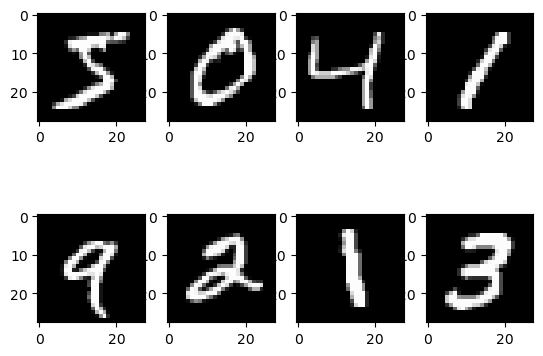

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
for i in range(8):
     # define subplot
    plt.subplot(240+1+i)
    # plot raw pixel data
    ith_image = X_train.iloc[i,:]
    ith_image_arr = ith_image.to_numpy()
    ith_image= ith_image_arr.reshape(28,28)
    plt.imshow(ith_image, cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

# Zadanie 4: Wizualizacja danych zredukowanych

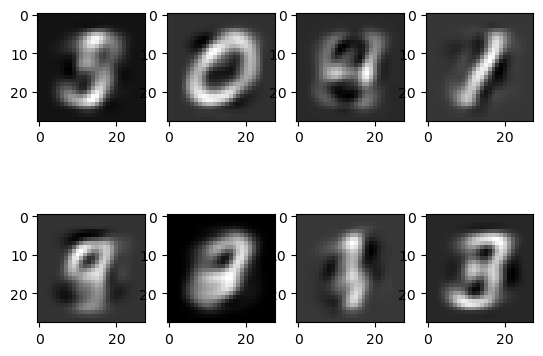

In [ ]:
# Twój kod

# Zadanie 5:   Model DT na danych oryginalnych

The MNIST dataset was loaded earlier.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
#from sklearn.metrics import f1_score

# Twój kod

t0 = time.time()
tree_clf.fit(X_train, y_train)
t1 = time.time()
print("Training took {:.2f}s".format(t1 - t0))

Training took 13.96s


In [ ]:
from sklearn.metrics import accuracy_score

# Twój kod: Accuracy

# Zadanie 6:   Model DT na danych zredukowanych

In [ ]:
from sklearn.decomposition import PCA

# Twój kod: Tworzyć zredukowany zbiór z wyaśnioną wariancją = 0.9


In [ ]:
tree_clf2 = DecisionTreeClassifier(n_estimators=10, random_state=42)
t0 = time.time()
tree_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 42.66s


In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9009

# Zadanie 7:  Regresja logistyczna na danych oryginalnych

In [ ]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf.fit(X_train, y_train)
t1 = time.time()

C:\Users\sinhh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 7.59s


In [ ]:
y_pred = log_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9255

In [ ]:
log_clf2 = LogisticRegression(multi_class="multinomial", solver="lbfgs", random_state=42)
t0 = time.time()
log_clf2.fit(X_train_reduced, y_train)
t1 = time.time()

C:\Users\sinhh\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print("Training took {:.2f}s".format(t1 - t0))

Training took 2.90s


In [ ]:
y_pred = log_clf2.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

0.9201

# Zadanie 8:  Algorytm kNN na danych oryginalnych i zredukowanych

In [ ]:
# Twójkod

#Zadanie 9: Wizualizacja za pomocą t_SNE i PCA

In [ ]:
# ZE względu na długo czas obliczenia. Do wizualicji wylosować 6000 rekordów
np.random.seed(42)

m = 6000
idx = np.random.permutation(60000)[:m]

X = X_train.to_numpy()[idx]
y = y_train.to_numpy()[idx]

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

In [ ]:
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Wizualizacja za pomocą PCA. Twój kod